## Домашнее задание "**Модели авторегрессии условной гетероскедантичности**"

In [1]:
!pip install arch

     |████████████████████████████████| 870kB 9.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for arch: filename=arch-4.16.1-cp36-cp36m-linux_x86_64.whl size=1179492 sha256=d1adc8a359e234c067b89d3de3ac4b82654565895d5856750bce2dc73046ff4d
  Stored in directory: /root/.cache/pip/wheels/a9/99/58/8fb4c930bff0a8c4deff117a09a7de19c2001099298976fbb1
Successfully built arch


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from arch import arch_model
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
### Убираем Варнинги
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import files
uploaded = files.upload()

Saving ._.DS_Store to ._.DS_Store
Saving ._~$Модели авторегрессии условной гетероскедантичности.pptx to ._~$Модели авторегрессии условной гетероскедантичности.pptx
Saving ._international-airline-passengers.csv to ._international-airline-passengers.csv
Saving ._monthly-boston-armed-robberies-j.csv to ._monthly-boston-armed-robberies-j.csv
Saving .DS_Store to .DS_Store
Saving ~$Модели авторегрессии условной гетероскедантичности.pptx to ~$Модели авторегрессии условной гетероскедантичности.pptx
Saving monthly-boston-armed-robberies-j.csv to monthly-boston-armed-robberies-j.csv
Saving Модели авторегрессии условной гетероскедантичности.pptx to Модели авторегрессии условной гетероскедантичности.pptx


In [8]:
from google.colab import files
uploaded = files.upload()

Saving mean-monthly-air-temperature-deg.csv to mean-monthly-air-temperature-deg.csv
Saving monthly-boston-armed-robberies-j.csv to monthly-boston-armed-robberies-j (1).csv
Saving monthly-sales-of-company-x-jan-6.csv to monthly-sales-of-company-x-jan-6.csv


In [10]:
from google.colab import files
uploaded = files.upload()

Saving ._daily-total-female-births-in-cal.csv to ._daily-total-female-births-in-cal.csv
Saving ._international-airline-passengers.csv to ._international-airline-passengers (1).csv
Saving ._mean-monthly-air-temperature-deg.csv to ._mean-monthly-air-temperature-deg.csv
Saving ._monthly-boston-armed-robberies-j.csv to ._monthly-boston-armed-robberies-j (1).csv
Saving ._monthly-sales-of-company-x-jan-6.csv to ._monthly-sales-of-company-x-jan-6.csv
Saving ._weekly-closings-of-the-dowjones-.csv to ._weekly-closings-of-the-dowjones-.csv


In [12]:
airlines_passengers = pd.read_csv("international-airline-passengers.csv")

In [13]:
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

In [14]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [15]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (5, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))
        qq_ax = plt.subplot2grid(layout, (4, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        
        plt.tight_layout()
    return

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


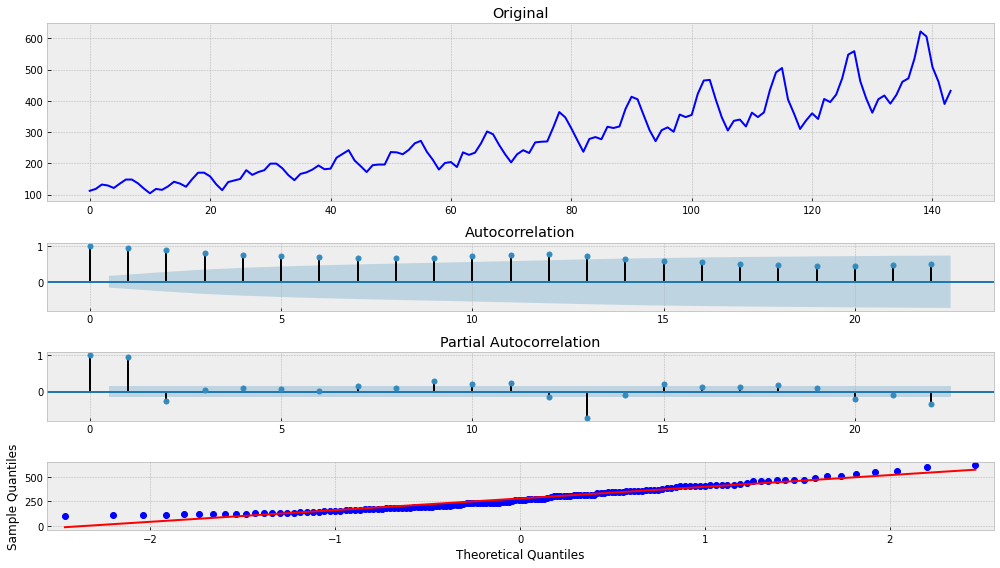

In [16]:
tsplot(airlines_passengers["Count"])

Стационарный ряд

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


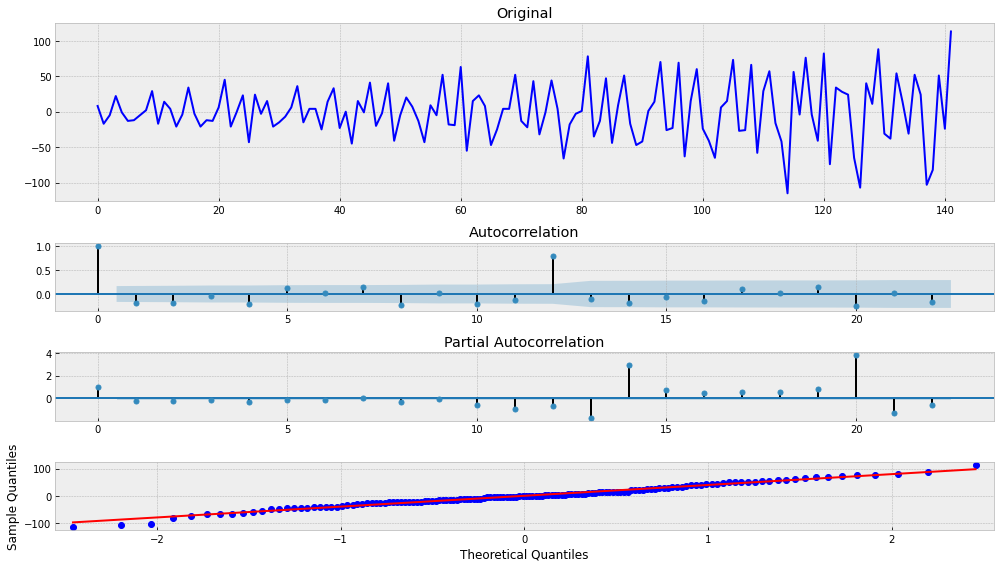

In [17]:
series = difference(airlines_passengers["Count"])
series = difference(series, 1)
tsplot(series)

In [18]:
def _get_best_model(TS):
    best_aic = np.inf 
    best_order = None
    best_mdl = None

    for i in range(5):
        for d in range(5):
            for j in range(5):
                try:
                    tmp_mdl = smt.ARIMA(TS, order=(i,d,j)).fit(
                        method='mle', trend='nc'
                    )
                    tmp_aic = tmp_mdl.aic
                    if tmp_aic < best_aic:
                        best_aic = tmp_aic
                        best_order = (i, d, j)
                        best_mdl = tmp_mdl
                except: continue
    print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))                    
    return best_aic, best_order, best_mdl

In [19]:
aic, order, mdl = _get_best_model(series)

aic: 1345.26860 | order: (4, 0, 4)


Results of Dickey-Fuller Test:
Test Statistic                  -2.223578
p-value                          0.197800
#Lags Used                      14.000000
Number of Observations Used    127.000000
Critical Value (1%)             -3.482920
Critical Value (5%)             -2.884580
Critical Value (10%)            -2.579058
dtype: float64


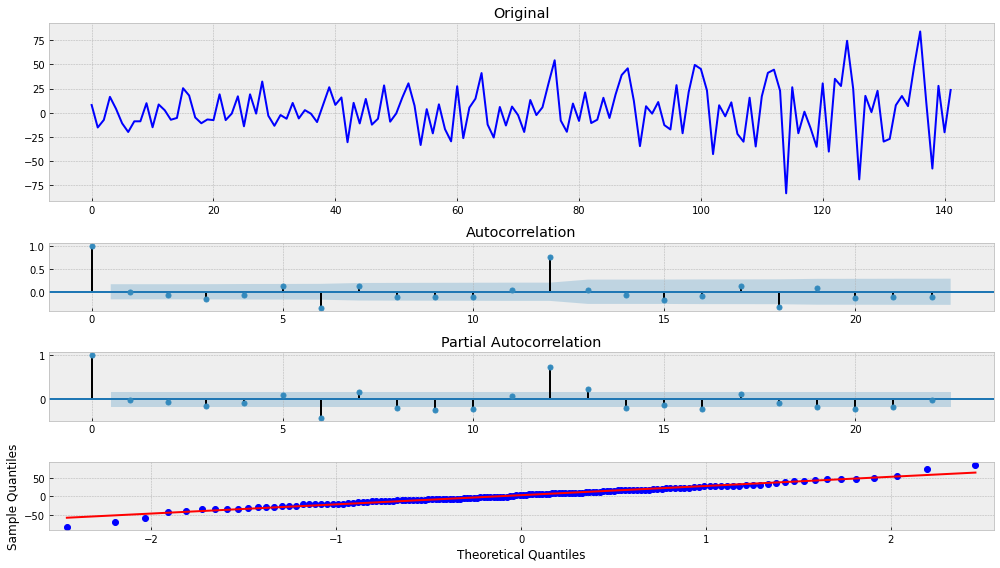

In [20]:
tsplot(mdl.resid)

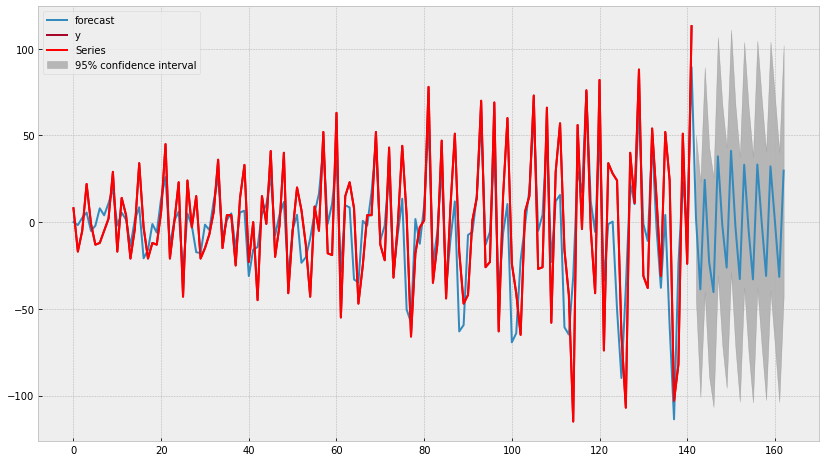

In [21]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14,8))
    ax = plt.axes()
    mdl.plot_predict(0, len(series)+20, ax=ax)
    plt.plot(series, color='red', label='Series')
    plt.legend()
    plt.show()

In [22]:
p_ = order[0]
o_ = order[1]
q_ = order[2]

am = arch_model(series, p=p_, o=o_, q=q_, dist='StudentsT')
res = am.fit(update_freq=5)
print(res.summary())

Iteration:      5,   Func. Count:     67,   Neg. LLF: 700.3344348293156
Iteration:     10,   Func. Count:    132,   Neg. LLF: 699.2920972076874
Iteration:     15,   Func. Count:    197,   Neg. LLF: 698.4694587713591
Iteration:     20,   Func. Count:    262,   Neg. LLF: 698.0207270373727
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 697.9835791782347
            Iterations: 24
            Function evaluations: 327
            Gradient evaluations: 24
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -697.984
Distribution:      Standardized Student's t   AIC:                           1417.97
Method:                  Maximum Likelihood   BIC:                          

Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64


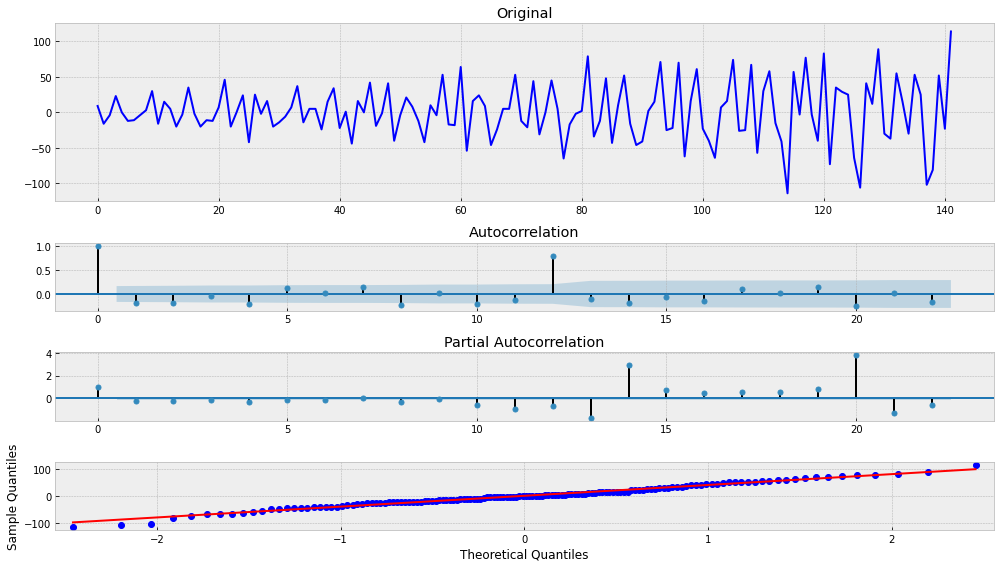

In [23]:
tsplot(res.resid)